In [1]:
import pandas as pd
import numpy as np
import cassiopeia as cas
import seaborn as sns
from os.path import join, exists
from os import makedirs, getcwd
from pandarallel import pandarallel
import networkx as nx
import matplotlib.pyplot as plt
from networkx.drawing.nx_agraph import write_dot, graphviz_layout
import pickle

In [2]:
af_f = "/data2/mito_lineage/data/processed/mttrace/TcellDupi_may17_2021/MTblacklist/post/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/af_by_cell.tsv"
donors = "/data2/mito_lineage/data/processed/mttrace/TcellDupi_may17_2021/MTblacklist/merged/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/filter_mgatk/vireoIn/multiplex/cells_meta.tsv"
prefix= "TcellDupi_may17_2021/MTblacklist"
name = "post_cass_test"
indir = "./output/data/"
outdir = "./output/data/treecluster_out/"

In [3]:
indir = join(indir, prefix)
outdir = join(outdir, prefix)
if not exists(outdir):
    print(f"Making outdir {outdir} in folder {getcwd()}")
    makedirs(outdir)

out_clusters = join(outdir, f"{name}_clusters")

In [4]:
in_tree = join(indir, f'{name}_hybrid.tree')

In [8]:
af = pd.read_csv(af_f, sep='\t', index_col=0)

In [9]:
af

,1040C,10634C,10646T,1082G,10912A,1095C,11123A,11137C,11175C,11204A,...,9531G,954G,9590T,9640T,9658G,971C,9750A,9823A,983T,9861G
Cell,,,,,,,,,,,,,,,,,,,,,
AAACGAAAGAACAGGA-1,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,...,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
AAACGAAAGATTGACA-1,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,...,0.937500,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
AAACGAAAGCGTTGCC-1,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
AAACGAAAGGTACTCT-1,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,...,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.066667,0.0
AAACGAAAGGTTAACA-1,0.0,0.0,0.0,0.0,0.0,0.000000,0.021277,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTTGTGTTCCGGAAAG-1,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,...,0.982301,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
TTTGTGTTCCTGACCT-1,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,...,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
TTTGTGTTCGGATGTT-1,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0


## Loop through multiple distance thresholds and run

In [5]:
for ind in range(10,40):
    cmd = f"TreeCluster.py -t {ind} -i {in_tree} > {out_clusters}.t{ind}.tsv"
    print(cmd)
    !{cmd}

TreeCluster.py -t 10 -i ./output/data/TcellDupi_may17_2021/MTblacklist/post_cass_test_hybrid.tree > ./output/data/treecluster_out/TcellDupi_may17_2021/MTblacklist/post_cass_test_clusters.t10.tsv
TreeCluster.py -t 11 -i ./output/data/TcellDupi_may17_2021/MTblacklist/post_cass_test_hybrid.tree > ./output/data/treecluster_out/TcellDupi_may17_2021/MTblacklist/post_cass_test_clusters.t11.tsv
TreeCluster.py -t 12 -i ./output/data/TcellDupi_may17_2021/MTblacklist/post_cass_test_hybrid.tree > ./output/data/treecluster_out/TcellDupi_may17_2021/MTblacklist/post_cass_test_clusters.t12.tsv
TreeCluster.py -t 13 -i ./output/data/TcellDupi_may17_2021/MTblacklist/post_cass_test_hybrid.tree > ./output/data/treecluster_out/TcellDupi_may17_2021/MTblacklist/post_cass_test_clusters.t13.tsv
TreeCluster.py -t 14 -i ./output/data/TcellDupi_may17_2021/MTblacklist/post_cass_test_hybrid.tree > ./output/data/treecluster_out/TcellDupi_may17_2021/MTblacklist/post_cass_test_clusters.t14.tsv
TreeCluster.py -t 15 -i .

In [87]:
treeresults_all

,t,ClusterNumber,num_cells
0,20,-1,4
1,20,1,239
2,20,2,51
3,20,3,234
4,20,4,2
...,...,...,...
99,20,99,15
100,20,100,15
101,20,101,14
102,20,102,136


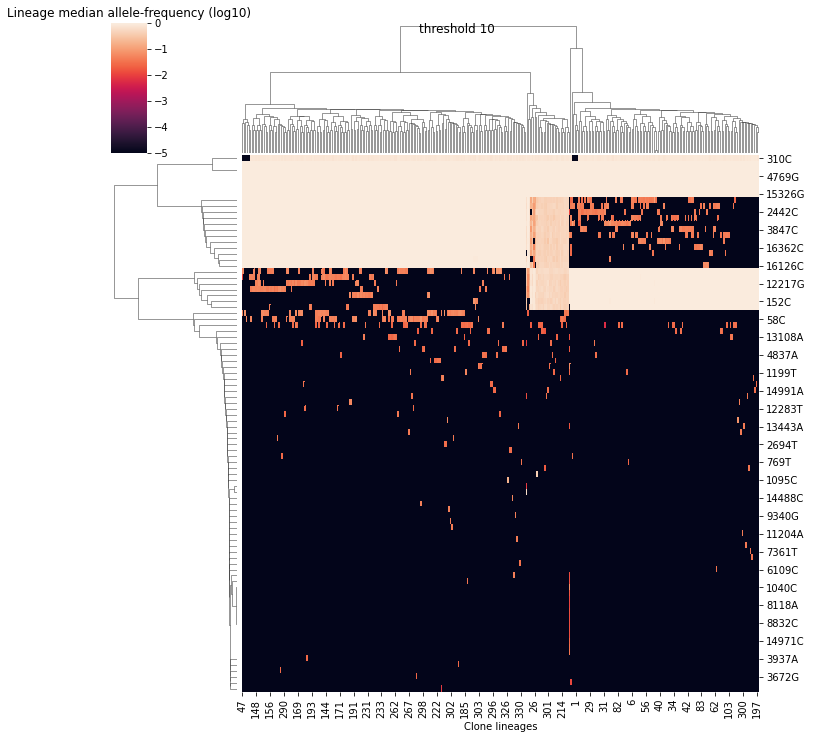

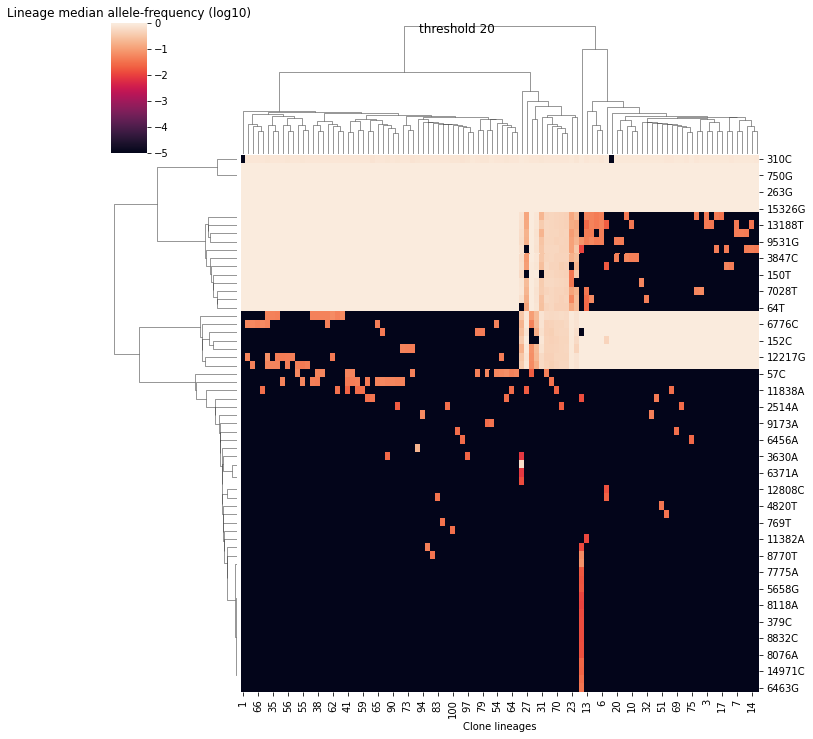

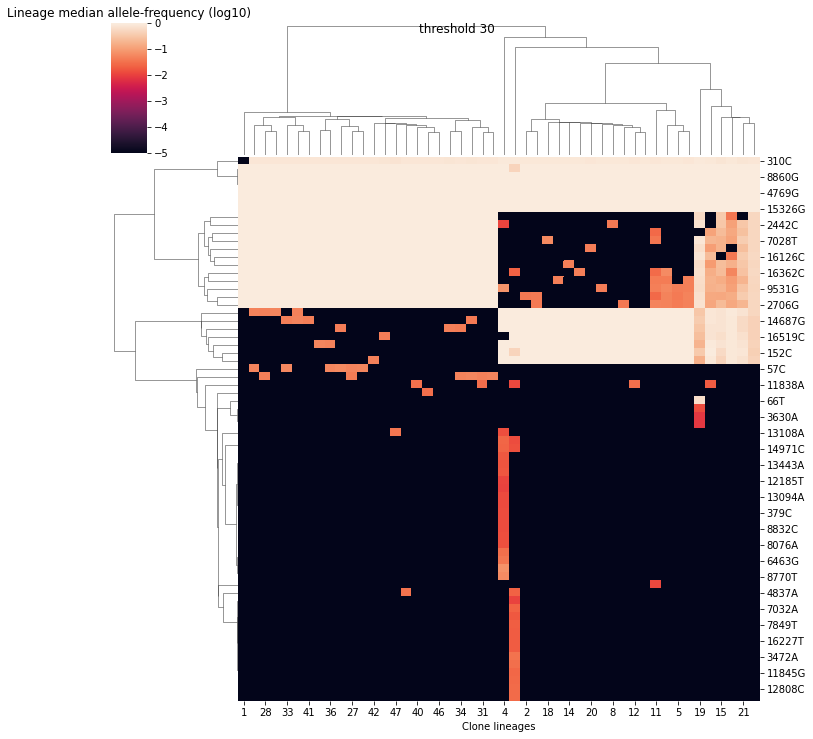

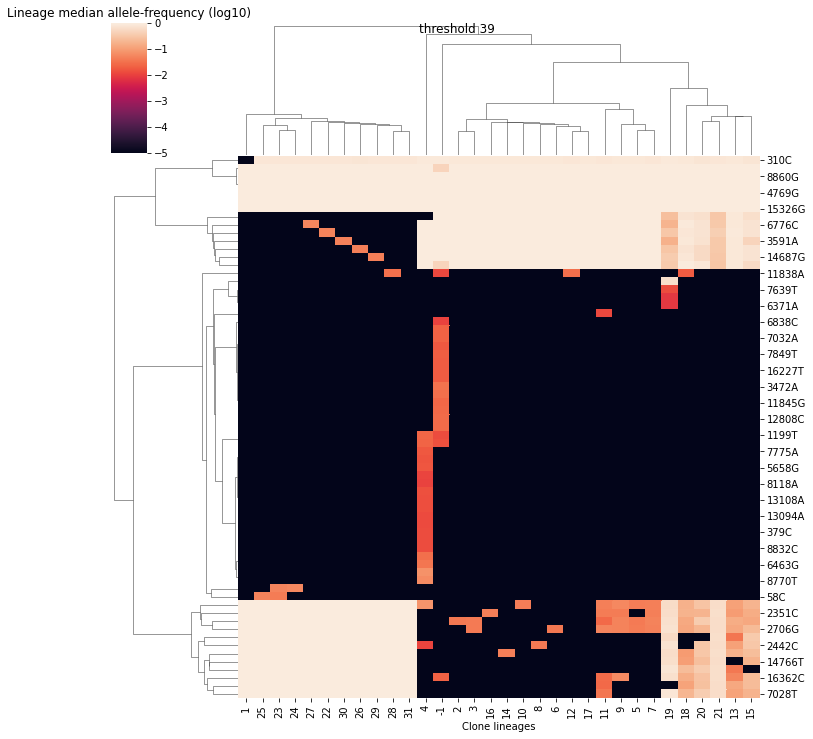

In [92]:
treeresults = {}
tree_df = {}
for t in [10, 20,30,39]:#range(10,40):
    #treeresults[ind] = pd.read_csv(f"{out_clusters}.t{ind}.tsv", sep='\t').groupby("ClusterNumber").size()
    tree_df = pd.read_csv(f"{out_clusters}.t{t}.tsv", sep='\t')

    #treeresults_all = pd.concat(treeresults).reset_index().rename({"level_0": "t", 0:"num_cells"}, axis=1)

    ## Get medoid of each cluster and run clustermap(?) or re-run cassiopeia?
    #tree_df = pd.concat(tree_df).reset_index().rename({"level_0":"t"}, axis=1)
    clusters_median_df = pd.DataFrame(index=tree_df["ClusterNumber"].unique(), columns=af.columns)
    for clust in tree_df["ClusterNumber"].unique():
        clusters_median_df.loc[clust, :] = af.loc[tree_df.loc[tree_df["ClusterNumber"]==clust, "SequenceName"]].median(axis=0)
    clusters_median_df

    ## Some variants are 0s, see how many and remove

    #(clusters_median_df==0).all().sum()/clusters_median_df.shape[0]

    clusters_median_df = clusters_median_df.loc[:, ~((clusters_median_df==0).all())]

    g = sns.clustermap(np.log10(clusters_median_df.astype(float)+0.00001).transpose())
    plt.title("Lineage median allele-frequency (log10)")
    g.ax_heatmap.set_xlabel("Clone lineages")
    g.fig.suptitle(f"threshold {t}")

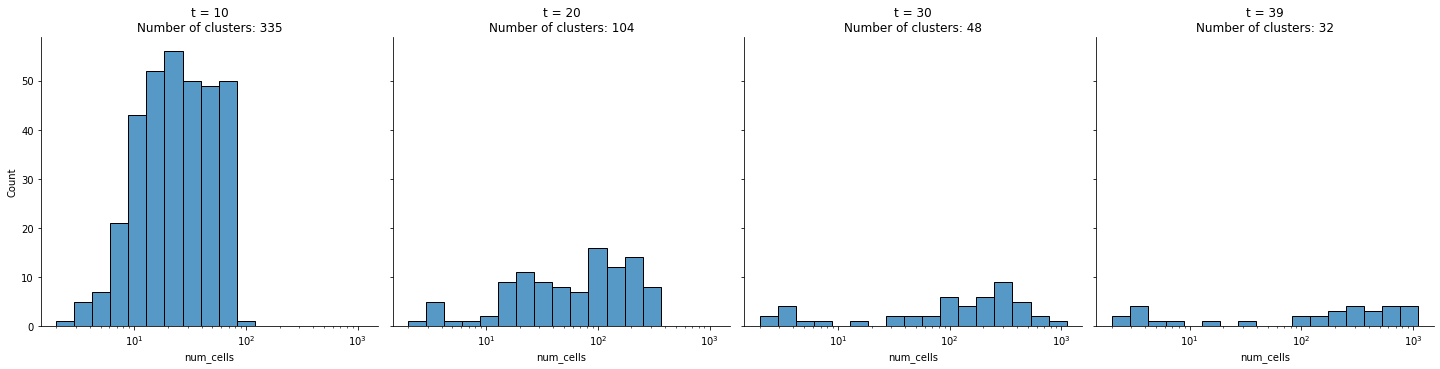

In [13]:
#g = sns.FacetGrid(data=treeresults_all, col='t', col_wrap=5)
g = sns.displot(data=treeresults_all, x="num_cells", col='t', col_wrap=5, log_scale=True)
for ax in g.axes.flatten():
    #print(ax.get_title())
    curr_txt = str(ax.get_title())
    curr_group = curr_txt.split(" = ")[-1]
    ax.set_title(f'{str(ax.get_title())}\nNumber of clusters: {treeresults_all[treeresults_all["t"] == int(curr_group)].shape[0]}')